# Домашнее задание №8 - Generative Adversarial Networks

Как было сказано ранее, GAN обучается воспроизводить реальные данные.
Поэтому Вам предлагается обучить генератор создавать точки, которые будут
лежать на графике функции

𝑦 = 𝑠𝑖𝑛(𝑥)/𝑥 − 𝑥/10

При выполнении данного задания структура GAN остается той же, но Вам нужно:
* Сгенерировать настоящие данные
* Изменить архитектуру дискриминатора и генератора
* Без графиков домашку не принимаю

In [3]:
import os
import numpy as np
import math

from torch.utils.data import DataLoader
import torchvision.transforms as transforms
from torchvision import datasets
from torch.autograd import Variable

import torch.nn as nn
import torch

########### Вывод изображений и их сохранение
import matplotlib.pyplot as plt

In [4]:
# https://github.com/matplotlib/matplotlib/issues/21513
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [9]:
size = 10000
x = torch.linspace(-20, 20, size)
y = torch.sin(x)/x - x/10

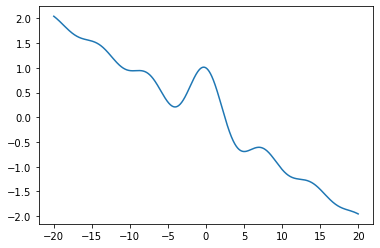

In [8]:
plt.plot(x,y)

In [10]:
class Generator(nn.Module):
    def __init__(self, output_size, latent_dim, n_blocks=4):
        super().__init__()
        
        # Использование таких словарей позволяет нам варьировать параметры нашей сети в процессе использования
        self.activations = nn.ModuleDict([
                ['lrelu', nn.LeakyReLU(0.2, inplace=True)],
                ['relu', nn.ReLU(0.2)]])
        
        def block(in_feat, out_feat, normalize=True, activation='relu'): #activation='relu
            layers = [nn.Linear(in_feat, out_feat)] # Если мы создаем последовательность слоев - то мы задаем их
                                                    # с помощью списка.
            if normalize:
                layers.append(nn.BatchNorm1d(out_feat, 0.8))
            layers.append(self.activations[activation]) # Эта сторчка означает тоже самое что и
                                                       # layers.append(nn.LeakyReLU(0.2, inplace=True))
            return layers

        self.model = nn.Sequential(
            *block(latent_dim, 128, normalize=False), # Звездочка означает unpacking списка
            *block(128, 256, activation='lrelu'),
            *block(256, 512),
            *block(512, 1024),
            nn.Linear(1024, output_size),
            nn.Tanh()
        )

        
    def forward(self, z):
        return self.model(z)

    
class Discriminator(nn.Module):
    def __init__(self, input_size):
        super().__init__()

        self.model = nn.Sequential(
            nn.Linear(input_size, 512),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(256, 1),
            nn.Sigmoid(),
        )

    def forward(self, x):
        validity = self.model(x)
        return validity


In [29]:
n_epochs = 50 # количество эпох
lr = 0.0002 # шаг обучения

b1 = 0.5 # гиперпараметр для оптимайзера Adam
b2 = 0.999 # гиперпараметр для оптимайзера Adam

latent_dim = 10 # Размерность случайного вектора, который подается на вход генератору


sample_interval = 25 # количество картинок для отображения процесса обучения

iters_in_epoch = 100

batch_size=100
y_batched = y.repeat((batch_size, 1))

In [32]:
generator = Generator(size, latent_dim)
discriminator = Discriminator(size)

# Для каждой нейронки свой опитимизатор
optimizer_G = torch.optim.Adam(generator.parameters(), lr=lr, betas=(b1, b2))
optimizer_D = torch.optim.Adam(discriminator.parameters(), lr=lr, betas=(b1, b2))

# Но вот функция ошибки у нас будет одна общая
adversarial_loss = torch.nn.MSELoss()  # torch.nn.BCELoss()

[Epoch 0/50] [Batch 0/100] [D loss: 0.251873] [G loss: 0.241657]


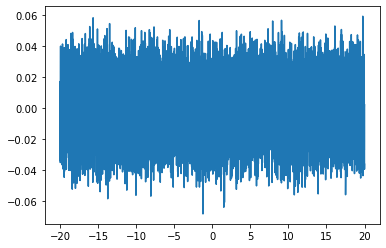

[Epoch 0/50] [Batch 25/100] [D loss: 0.174278] [G loss: 0.168040]


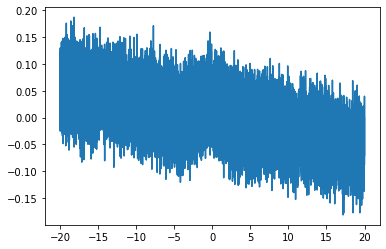

[Epoch 0/50] [Batch 50/100] [D loss: 0.377147] [G loss: 0.018501]


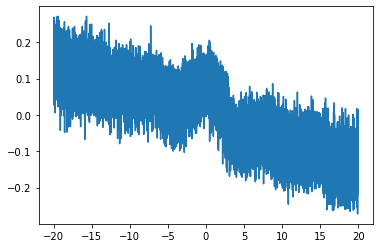

[Epoch 0/50] [Batch 75/100] [D loss: 0.182704] [G loss: 0.217701]


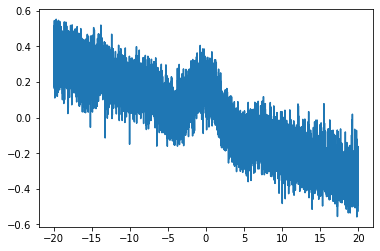

[Epoch 1/50] [Batch 0/100] [D loss: 0.216431] [G loss: 0.120683]


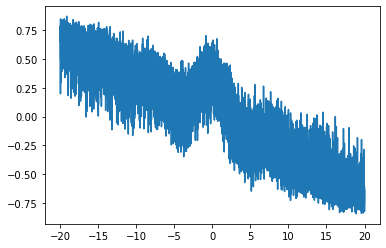

[Epoch 1/50] [Batch 25/100] [D loss: 0.238424] [G loss: 0.101949]


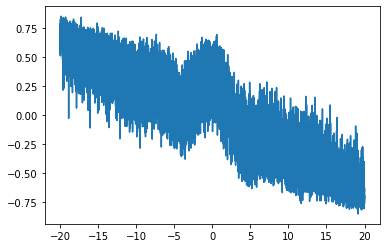

[Epoch 1/50] [Batch 50/100] [D loss: 0.172080] [G loss: 0.191603]


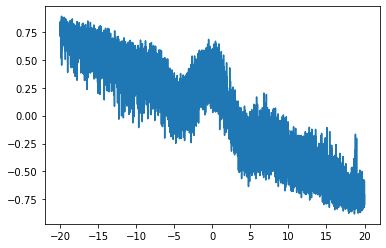

[Epoch 1/50] [Batch 75/100] [D loss: 0.291581] [G loss: 0.059244]


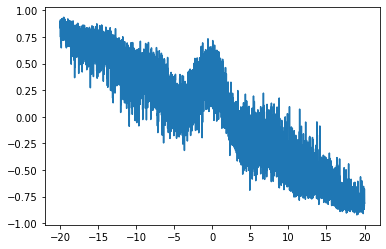

[Epoch 2/50] [Batch 0/100] [D loss: 0.268186] [G loss: 0.074017]


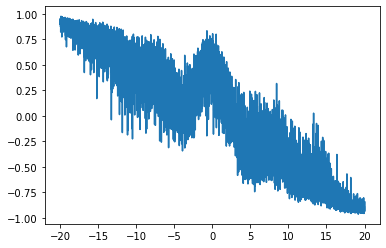

[Epoch 2/50] [Batch 25/100] [D loss: 0.231447] [G loss: 0.112943]


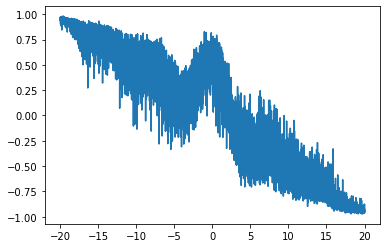

[Epoch 2/50] [Batch 50/100] [D loss: 0.189347] [G loss: 0.177379]


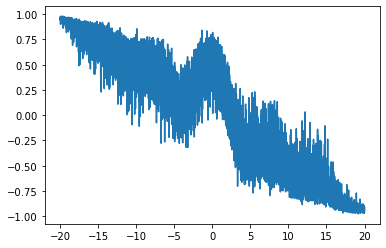

[Epoch 2/50] [Batch 75/100] [D loss: 0.196842] [G loss: 0.178212]


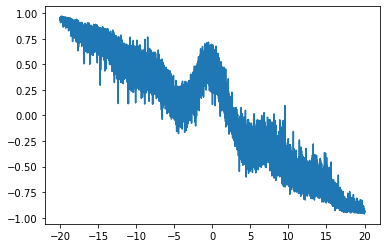

[Epoch 3/50] [Batch 0/100] [D loss: 0.203399] [G loss: 0.236956]


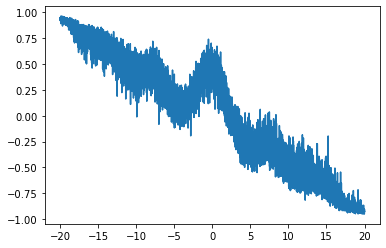

[Epoch 3/50] [Batch 25/100] [D loss: 0.237330] [G loss: 0.430541]


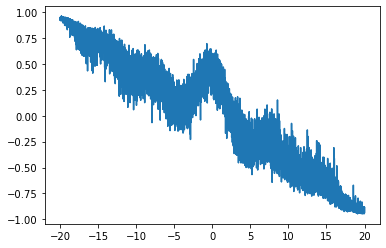

[Epoch 3/50] [Batch 50/100] [D loss: 0.162103] [G loss: 0.312852]


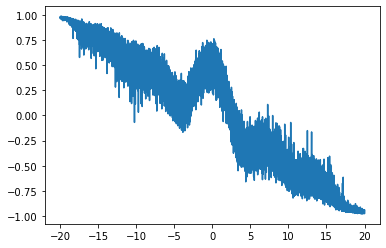

[Epoch 3/50] [Batch 75/100] [D loss: 0.199976] [G loss: 0.206220]


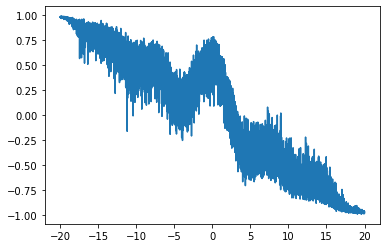

[Epoch 4/50] [Batch 0/100] [D loss: 0.144890] [G loss: 0.276681]


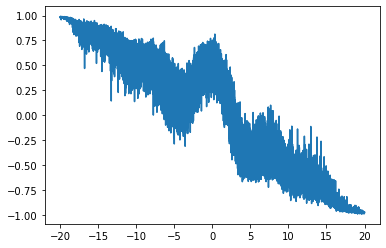

[Epoch 4/50] [Batch 25/100] [D loss: 0.172824] [G loss: 0.221484]


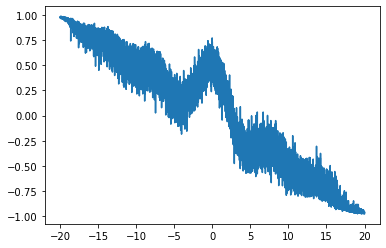

[Epoch 4/50] [Batch 50/100] [D loss: 0.238795] [G loss: 0.154862]


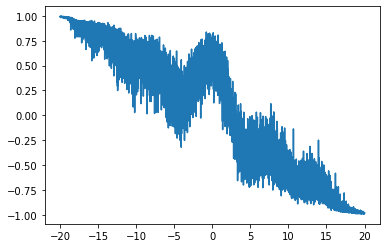

[Epoch 4/50] [Batch 75/100] [D loss: 0.187924] [G loss: 0.246557]


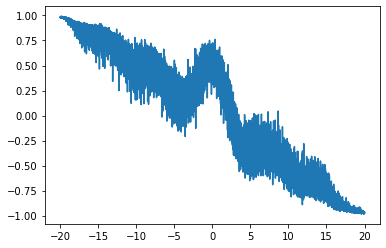

[Epoch 5/50] [Batch 0/100] [D loss: 0.191719] [G loss: 0.292257]


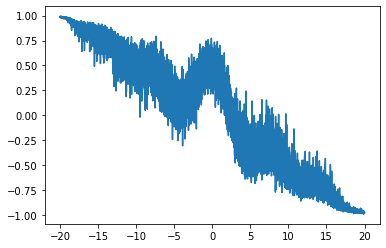

[Epoch 5/50] [Batch 25/100] [D loss: 0.226242] [G loss: 0.112589]


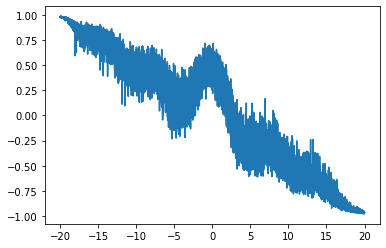

[Epoch 5/50] [Batch 50/100] [D loss: 0.202863] [G loss: 0.210831]


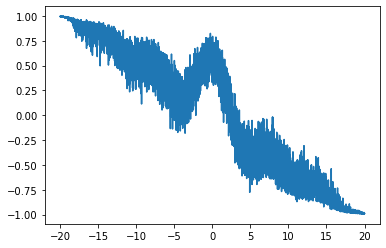

[Epoch 5/50] [Batch 75/100] [D loss: 0.169448] [G loss: 0.225449]


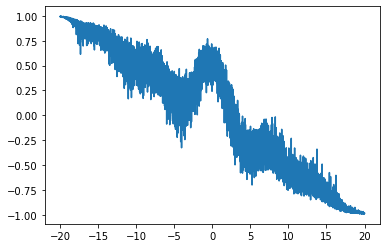

[Epoch 6/50] [Batch 0/100] [D loss: 0.230156] [G loss: 0.245839]


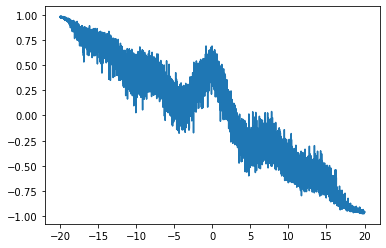

[Epoch 6/50] [Batch 25/100] [D loss: 0.162496] [G loss: 0.276586]


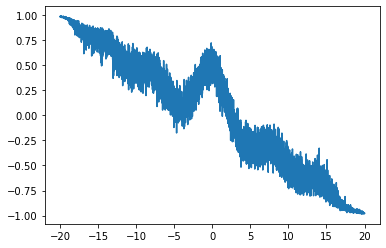

[Epoch 6/50] [Batch 50/100] [D loss: 0.215780] [G loss: 0.119472]


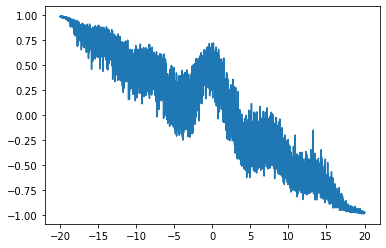

[Epoch 6/50] [Batch 75/100] [D loss: 0.211108] [G loss: 0.151824]


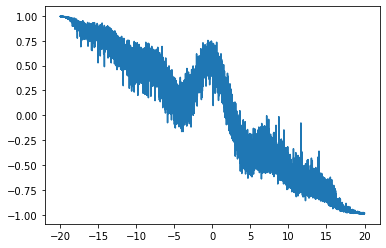

[Epoch 7/50] [Batch 0/100] [D loss: 0.230780] [G loss: 0.322728]


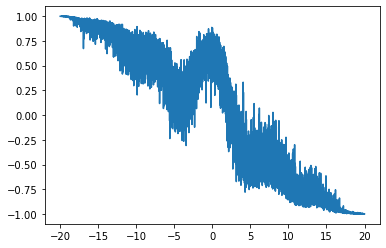

[Epoch 7/50] [Batch 25/100] [D loss: 0.192048] [G loss: 0.235267]


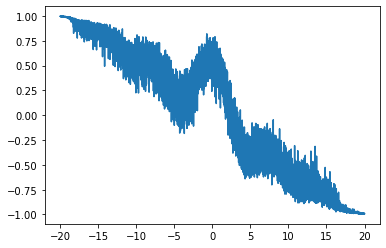

[Epoch 7/50] [Batch 50/100] [D loss: 0.190553] [G loss: 0.170544]


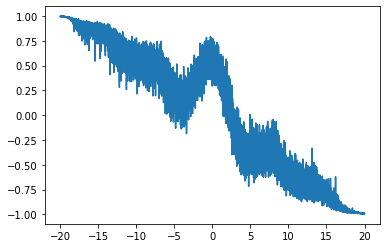

[Epoch 7/50] [Batch 75/100] [D loss: 0.205103] [G loss: 0.191357]


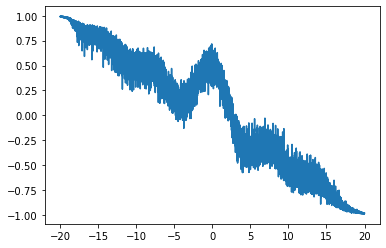

[Epoch 8/50] [Batch 0/100] [D loss: 0.169637] [G loss: 0.292707]


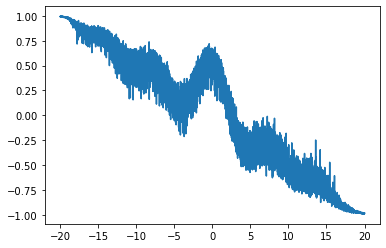

[Epoch 8/50] [Batch 25/100] [D loss: 0.209154] [G loss: 0.468833]


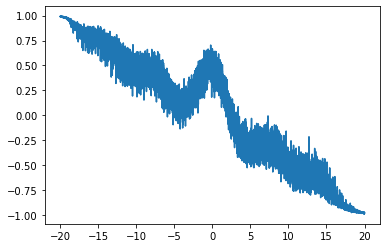

[Epoch 8/50] [Batch 50/100] [D loss: 0.245155] [G loss: 0.316627]


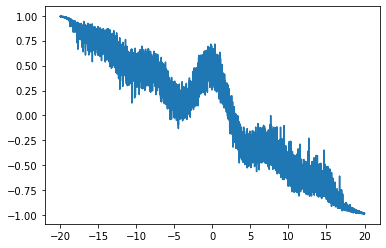

[Epoch 8/50] [Batch 75/100] [D loss: 0.178267] [G loss: 0.227992]


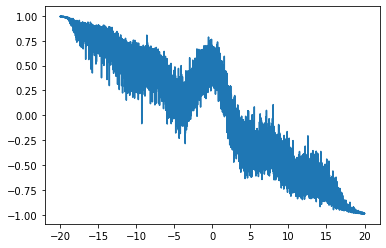

[Epoch 9/50] [Batch 0/100] [D loss: 0.218521] [G loss: 0.228864]


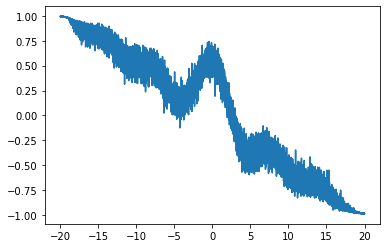

[Epoch 9/50] [Batch 25/100] [D loss: 0.152252] [G loss: 0.268896]


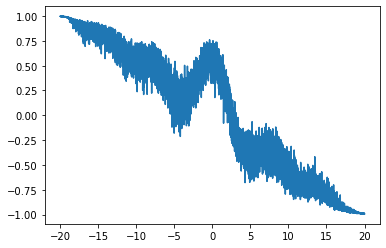

[Epoch 9/50] [Batch 50/100] [D loss: 0.212038] [G loss: 0.145753]


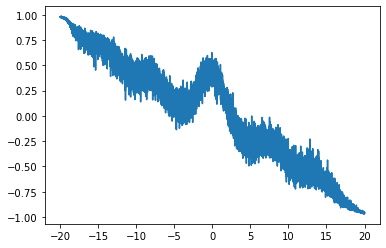

[Epoch 9/50] [Batch 75/100] [D loss: 0.166432] [G loss: 0.243899]


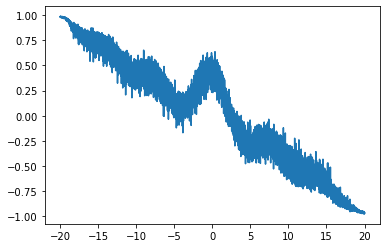

[Epoch 10/50] [Batch 0/100] [D loss: 0.146426] [G loss: 0.272820]


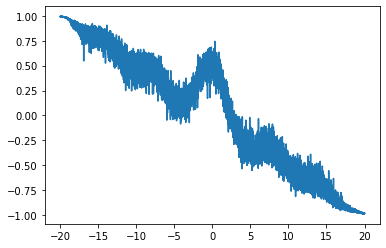

[Epoch 10/50] [Batch 25/100] [D loss: 0.228431] [G loss: 0.153889]


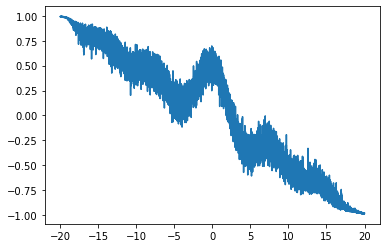

[Epoch 10/50] [Batch 50/100] [D loss: 0.204251] [G loss: 0.176158]


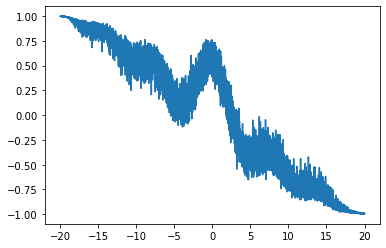

[Epoch 10/50] [Batch 75/100] [D loss: 0.117604] [G loss: 0.409607]


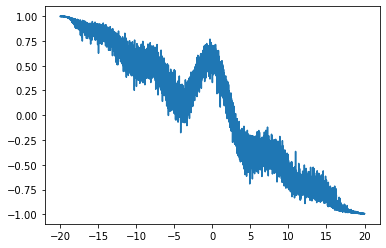

[Epoch 11/50] [Batch 0/100] [D loss: 0.234040] [G loss: 0.100701]


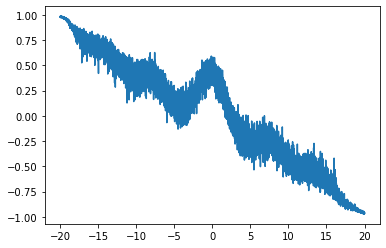

[Epoch 11/50] [Batch 25/100] [D loss: 0.137104] [G loss: 0.328803]


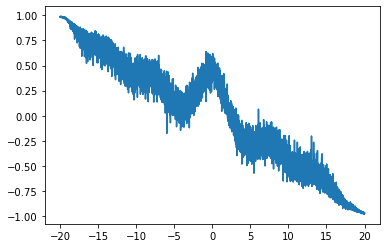

[Epoch 11/50] [Batch 50/100] [D loss: 0.121377] [G loss: 0.398847]


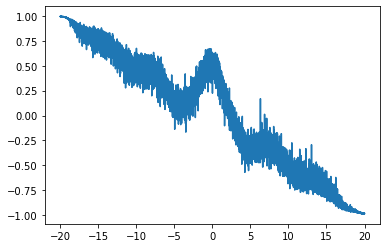

[Epoch 11/50] [Batch 75/100] [D loss: 0.190604] [G loss: 0.165314]


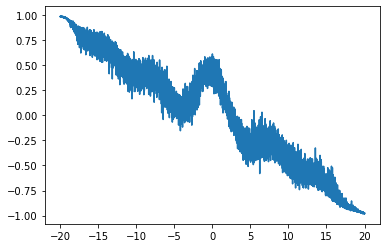

[Epoch 12/50] [Batch 0/100] [D loss: 0.304146] [G loss: 0.466459]


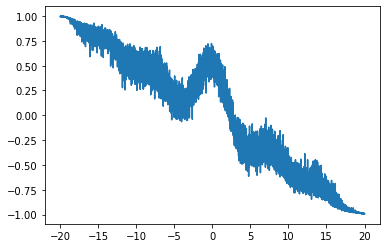

[Epoch 12/50] [Batch 25/100] [D loss: 0.144323] [G loss: 0.564439]


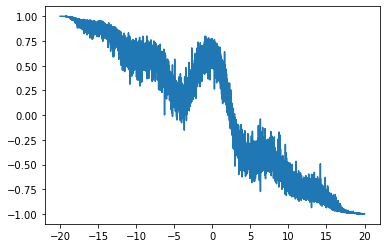

[Epoch 12/50] [Batch 50/100] [D loss: 0.166194] [G loss: 0.245972]


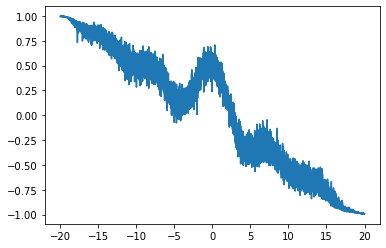

[Epoch 12/50] [Batch 75/100] [D loss: 0.161758] [G loss: 0.238445]


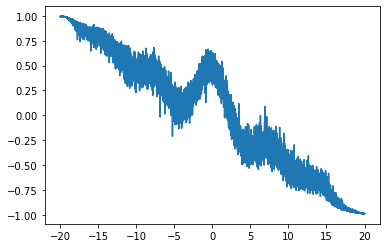

[Epoch 13/50] [Batch 0/100] [D loss: 0.168443] [G loss: 0.401023]


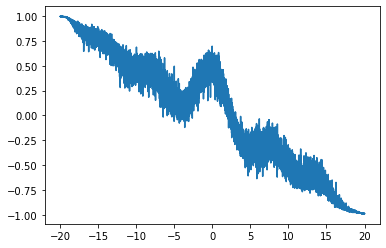

[Epoch 13/50] [Batch 25/100] [D loss: 0.149490] [G loss: 0.291650]


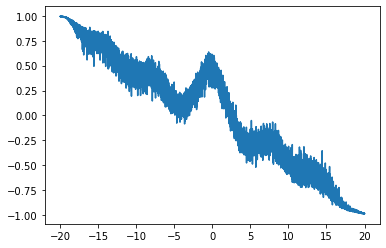

[Epoch 13/50] [Batch 50/100] [D loss: 0.150558] [G loss: 0.248819]


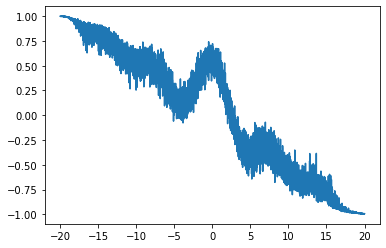

[Epoch 13/50] [Batch 75/100] [D loss: 0.263126] [G loss: 0.076536]


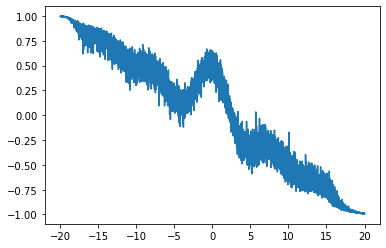

[Epoch 14/50] [Batch 0/100] [D loss: 0.219299] [G loss: 0.125128]


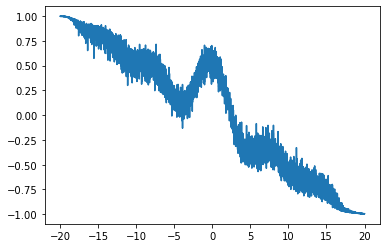

[Epoch 14/50] [Batch 25/100] [D loss: 0.149291] [G loss: 0.455730]


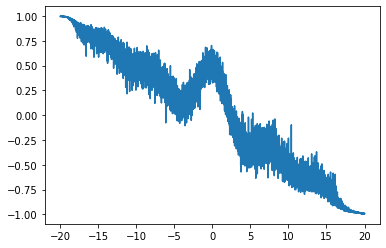

[Epoch 14/50] [Batch 50/100] [D loss: 0.141619] [G loss: 0.293603]


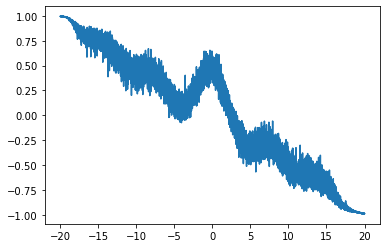

[Epoch 14/50] [Batch 75/100] [D loss: 0.099063] [G loss: 0.403635]


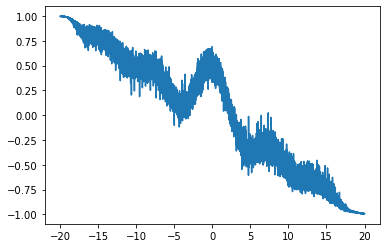

[Epoch 15/50] [Batch 0/100] [D loss: 0.101200] [G loss: 0.397482]


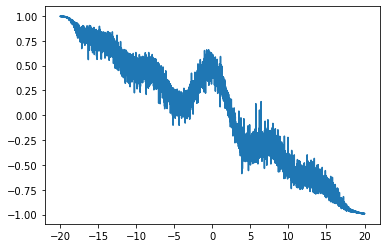

[Epoch 15/50] [Batch 25/100] [D loss: 0.107767] [G loss: 0.485607]


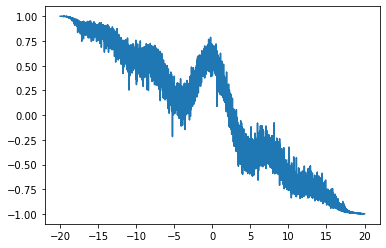

[Epoch 15/50] [Batch 50/100] [D loss: 0.192931] [G loss: 0.154159]


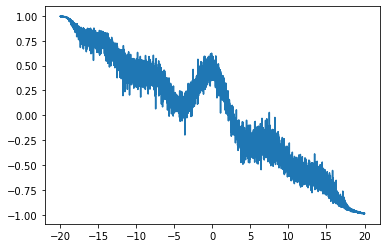

[Epoch 15/50] [Batch 75/100] [D loss: 0.105754] [G loss: 0.436209]


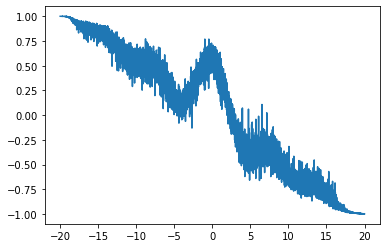

[Epoch 16/50] [Batch 0/100] [D loss: 0.100139] [G loss: 0.332587]


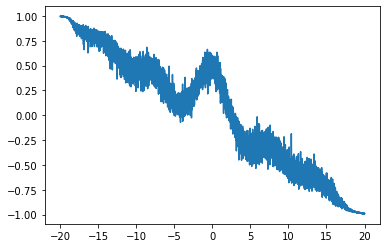

[Epoch 16/50] [Batch 25/100] [D loss: 0.129229] [G loss: 0.438126]


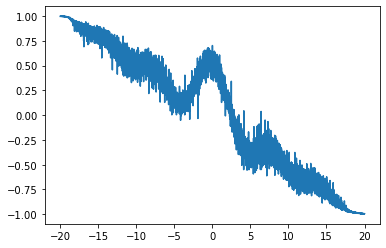

[Epoch 16/50] [Batch 50/100] [D loss: 0.293293] [G loss: 0.055008]


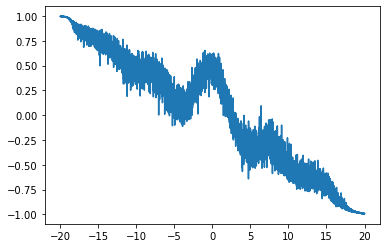

[Epoch 16/50] [Batch 75/100] [D loss: 0.210776] [G loss: 0.470991]


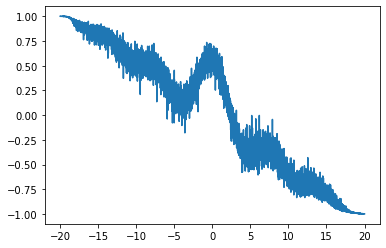

[Epoch 17/50] [Batch 0/100] [D loss: 0.140250] [G loss: 0.246109]


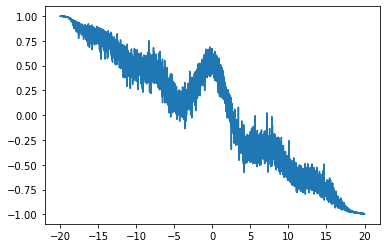

[Epoch 17/50] [Batch 25/100] [D loss: 0.112267] [G loss: 0.536274]


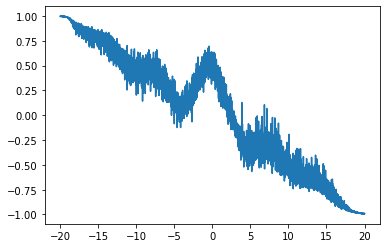

[Epoch 17/50] [Batch 50/100] [D loss: 0.095365] [G loss: 0.423938]


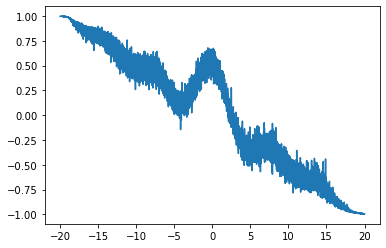

[Epoch 17/50] [Batch 75/100] [D loss: 0.118717] [G loss: 0.386476]


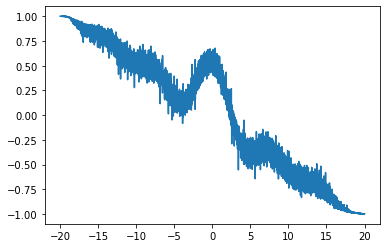

[Epoch 18/50] [Batch 0/100] [D loss: 0.129187] [G loss: 0.315546]


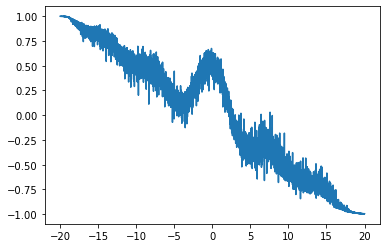

[Epoch 18/50] [Batch 25/100] [D loss: 0.118400] [G loss: 0.289420]


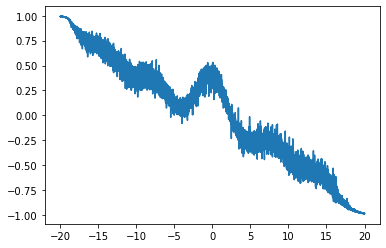

[Epoch 18/50] [Batch 50/100] [D loss: 0.245519] [G loss: 0.766871]


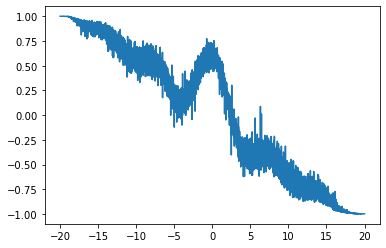

[Epoch 18/50] [Batch 75/100] [D loss: 0.100371] [G loss: 0.529850]


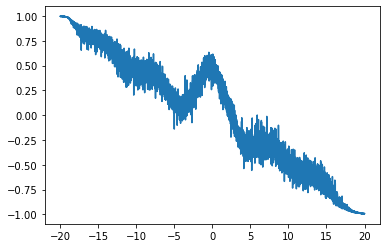

[Epoch 19/50] [Batch 0/100] [D loss: 0.080061] [G loss: 0.402791]


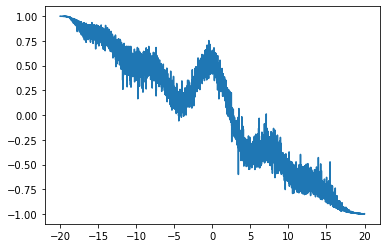

[Epoch 19/50] [Batch 25/100] [D loss: 0.091551] [G loss: 0.387182]


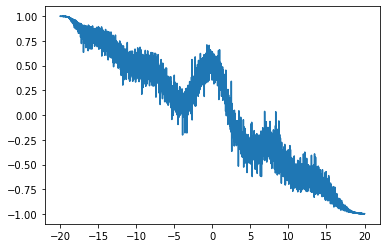

[Epoch 19/50] [Batch 50/100] [D loss: 0.127413] [G loss: 0.309481]


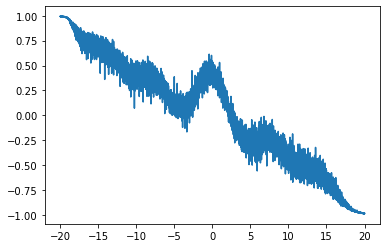

[Epoch 19/50] [Batch 75/100] [D loss: 0.096811] [G loss: 0.398324]


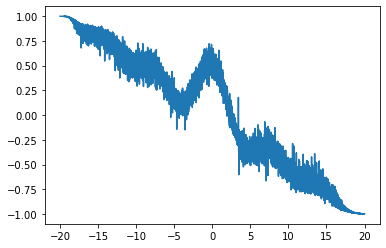

[Epoch 20/50] [Batch 0/100] [D loss: 0.104895] [G loss: 0.334508]


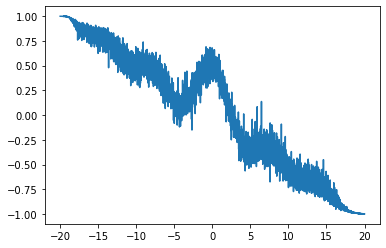

[Epoch 20/50] [Batch 25/100] [D loss: 0.085282] [G loss: 0.441502]


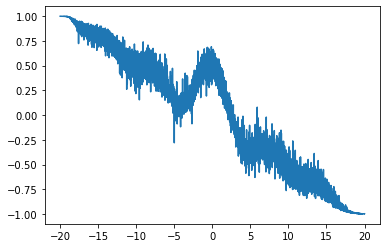

[Epoch 20/50] [Batch 50/100] [D loss: 0.144380] [G loss: 0.219366]


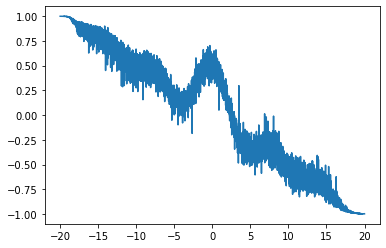

[Epoch 20/50] [Batch 75/100] [D loss: 0.078138] [G loss: 0.420619]


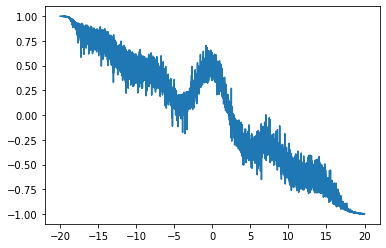

[Epoch 21/50] [Batch 0/100] [D loss: 0.087870] [G loss: 0.418699]


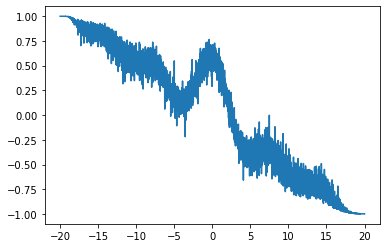

[Epoch 21/50] [Batch 25/100] [D loss: 0.084605] [G loss: 0.403517]


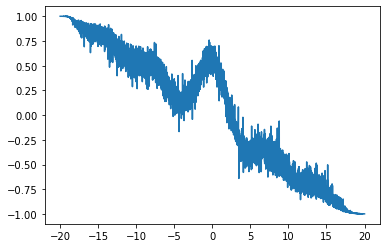

[Epoch 21/50] [Batch 50/100] [D loss: 0.086413] [G loss: 0.411173]


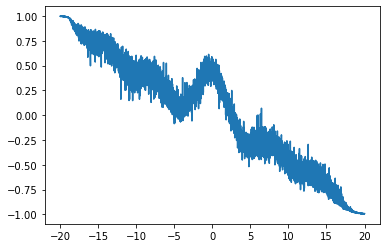

[Epoch 21/50] [Batch 75/100] [D loss: 0.080176] [G loss: 0.461091]


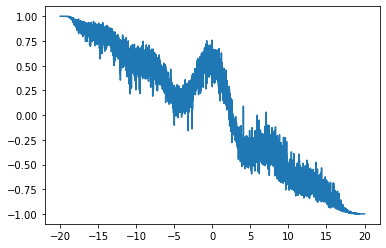

[Epoch 22/50] [Batch 0/100] [D loss: 0.066593] [G loss: 0.473005]


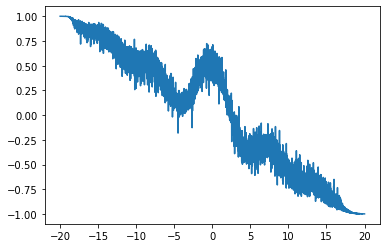

[Epoch 22/50] [Batch 25/100] [D loss: 0.072155] [G loss: 0.512854]


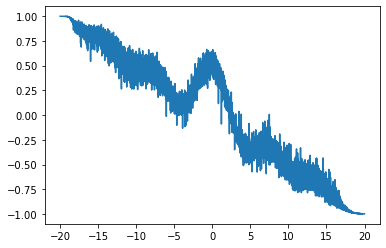

[Epoch 22/50] [Batch 50/100] [D loss: 0.073179] [G loss: 0.479907]


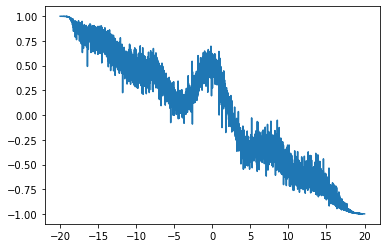

[Epoch 22/50] [Batch 75/100] [D loss: 0.050615] [G loss: 0.584627]


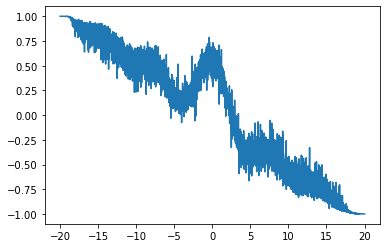

[Epoch 23/50] [Batch 0/100] [D loss: 0.059930] [G loss: 0.499281]


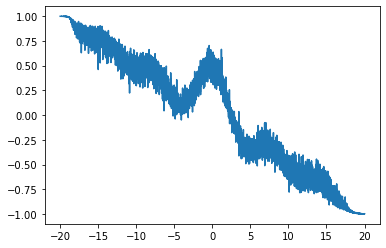

[Epoch 23/50] [Batch 25/100] [D loss: 0.053143] [G loss: 0.505776]


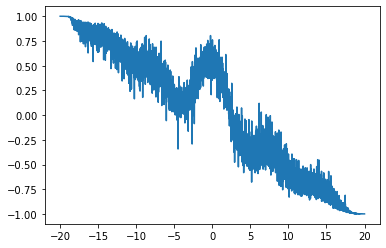

[Epoch 23/50] [Batch 50/100] [D loss: 0.049922] [G loss: 0.538281]


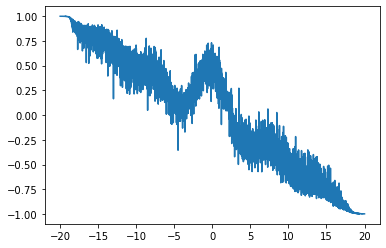

[Epoch 23/50] [Batch 75/100] [D loss: 0.101249] [G loss: 0.312377]


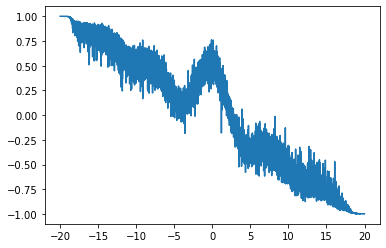

[Epoch 24/50] [Batch 0/100] [D loss: 0.059316] [G loss: 0.456875]


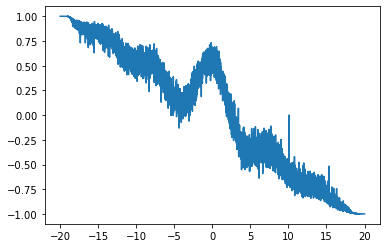

[Epoch 24/50] [Batch 25/100] [D loss: 0.051528] [G loss: 0.480603]


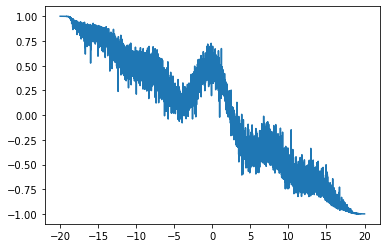

[Epoch 24/50] [Batch 50/100] [D loss: 0.045597] [G loss: 0.545781]


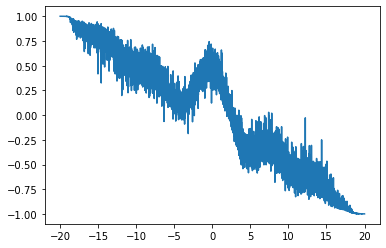

[Epoch 24/50] [Batch 75/100] [D loss: 0.173051] [G loss: 0.170019]


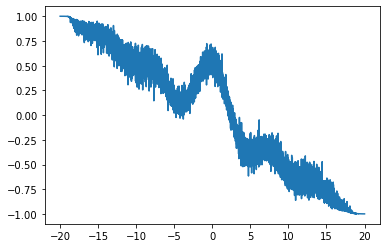

[Epoch 25/50] [Batch 0/100] [D loss: 0.085091] [G loss: 0.350756]


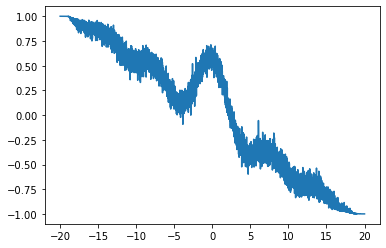

[Epoch 25/50] [Batch 25/100] [D loss: 0.056369] [G loss: 0.517995]


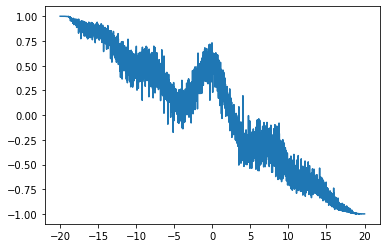

[Epoch 25/50] [Batch 50/100] [D loss: 0.047137] [G loss: 0.514904]


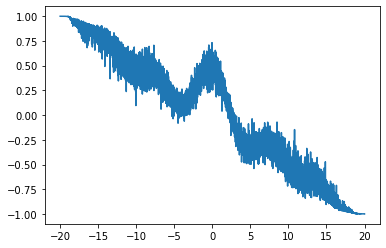

[Epoch 25/50] [Batch 75/100] [D loss: 0.043924] [G loss: 0.639777]


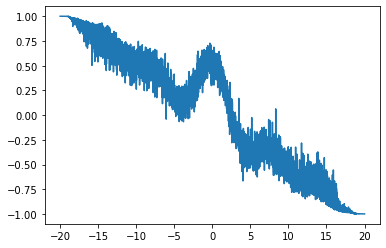

[Epoch 26/50] [Batch 0/100] [D loss: 0.045388] [G loss: 0.561730]


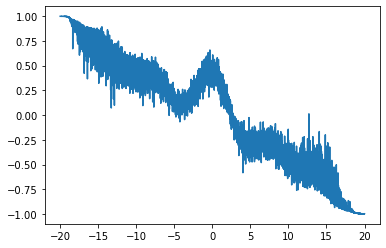

[Epoch 26/50] [Batch 25/100] [D loss: 0.043606] [G loss: 0.566599]


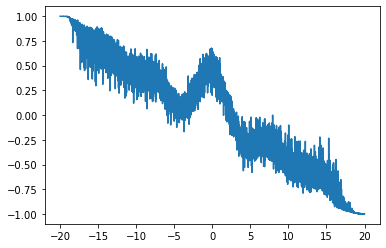

[Epoch 26/50] [Batch 50/100] [D loss: 0.043127] [G loss: 0.581483]


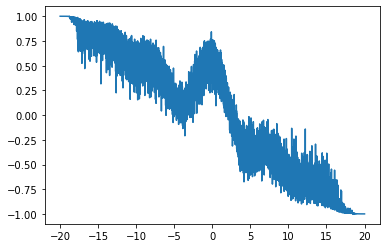

[Epoch 26/50] [Batch 75/100] [D loss: 0.039568] [G loss: 0.563863]


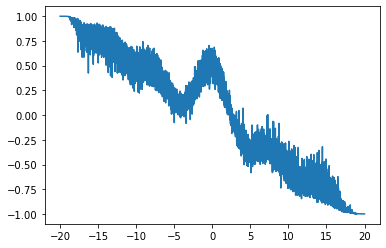

[Epoch 27/50] [Batch 0/100] [D loss: 0.029695] [G loss: 0.645656]


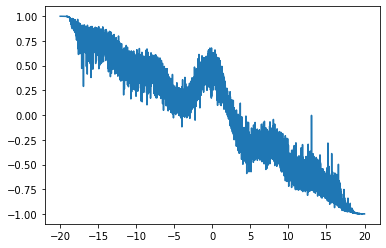

[Epoch 27/50] [Batch 25/100] [D loss: 0.036007] [G loss: 0.609563]


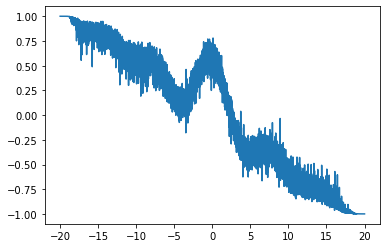

[Epoch 27/50] [Batch 50/100] [D loss: 0.067820] [G loss: 0.401545]


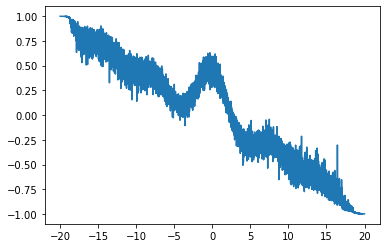

[Epoch 27/50] [Batch 75/100] [D loss: 0.035794] [G loss: 0.596920]


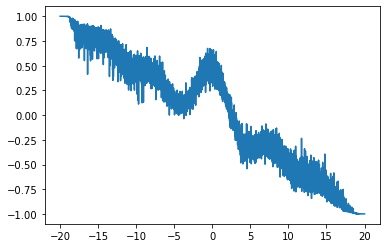

[Epoch 28/50] [Batch 0/100] [D loss: 0.036811] [G loss: 0.653557]


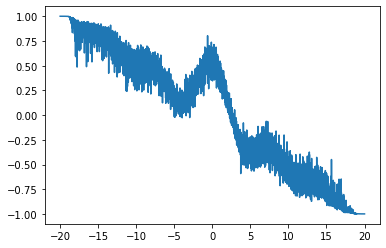

[Epoch 28/50] [Batch 25/100] [D loss: 0.030926] [G loss: 0.622267]


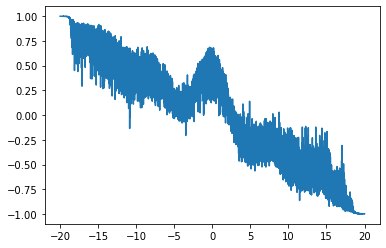

[Epoch 28/50] [Batch 50/100] [D loss: 0.030712] [G loss: 0.633845]


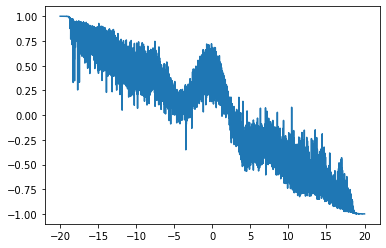

[Epoch 28/50] [Batch 75/100] [D loss: 0.029445] [G loss: 0.669376]


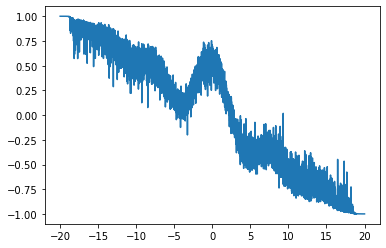

[Epoch 29/50] [Batch 0/100] [D loss: 0.027553] [G loss: 0.638833]


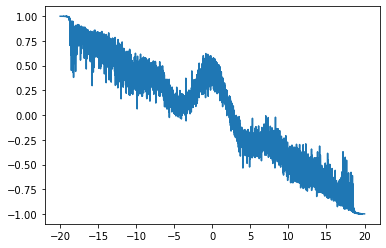

[Epoch 29/50] [Batch 25/100] [D loss: 0.025595] [G loss: 0.643170]


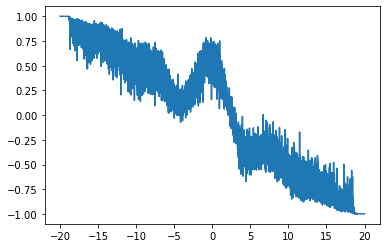

[Epoch 29/50] [Batch 50/100] [D loss: 0.025574] [G loss: 0.656238]


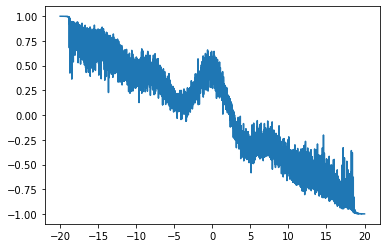

[Epoch 29/50] [Batch 75/100] [D loss: 0.026077] [G loss: 0.631609]


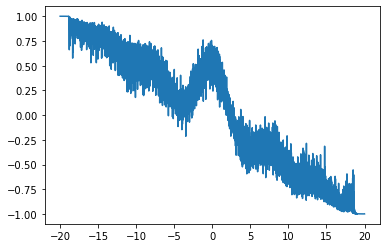

[Epoch 30/50] [Batch 0/100] [D loss: 0.023919] [G loss: 0.688777]


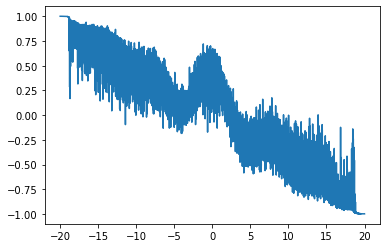

[Epoch 30/50] [Batch 25/100] [D loss: 0.020487] [G loss: 0.705648]


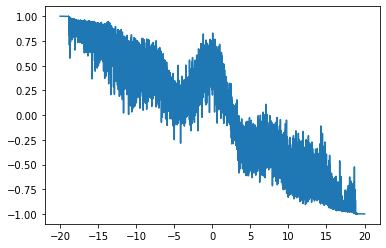

[Epoch 30/50] [Batch 50/100] [D loss: 0.024868] [G loss: 0.664380]


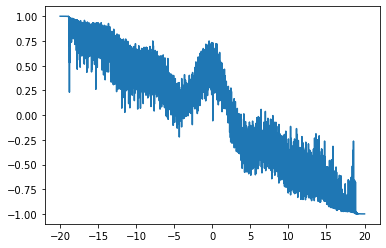

[Epoch 30/50] [Batch 75/100] [D loss: 0.039900] [G loss: 0.779574]


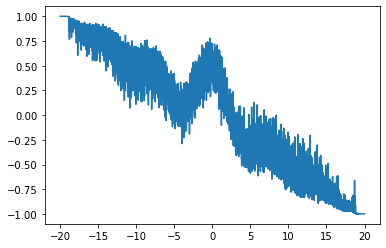

[Epoch 31/50] [Batch 0/100] [D loss: 0.025110] [G loss: 0.640264]


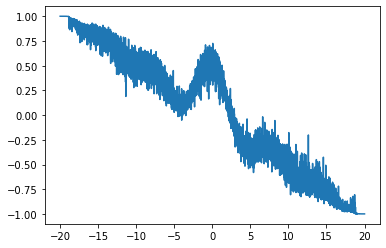

[Epoch 31/50] [Batch 25/100] [D loss: 0.024717] [G loss: 0.639624]


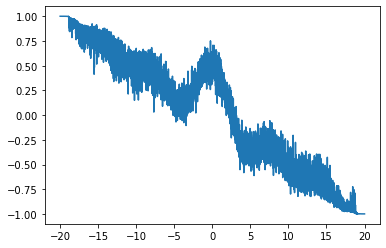

[Epoch 31/50] [Batch 50/100] [D loss: 0.019969] [G loss: 0.700072]


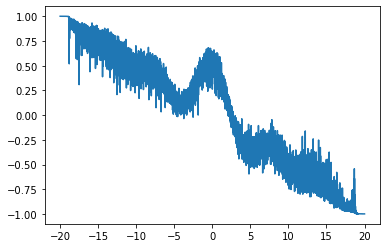

[Epoch 31/50] [Batch 75/100] [D loss: 0.020700] [G loss: 0.656212]


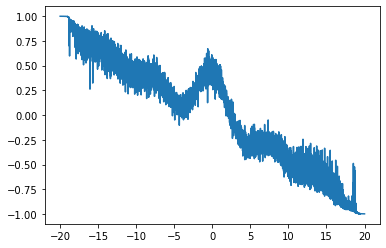

[Epoch 32/50] [Batch 0/100] [D loss: 0.022505] [G loss: 0.750289]


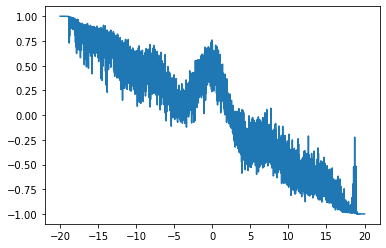

[Epoch 32/50] [Batch 25/100] [D loss: 0.016616] [G loss: 0.704527]


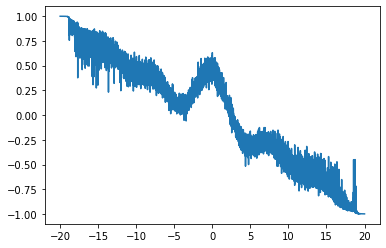

[Epoch 32/50] [Batch 50/100] [D loss: 0.015690] [G loss: 0.727981]


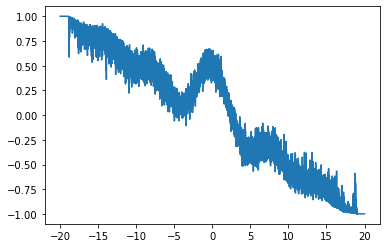

[Epoch 32/50] [Batch 75/100] [D loss: 0.019228] [G loss: 0.762769]


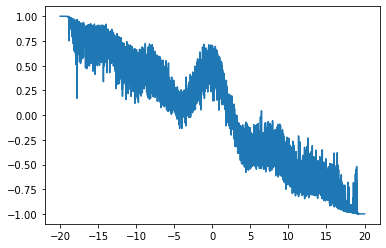

[Epoch 33/50] [Batch 0/100] [D loss: 0.014903] [G loss: 0.729022]


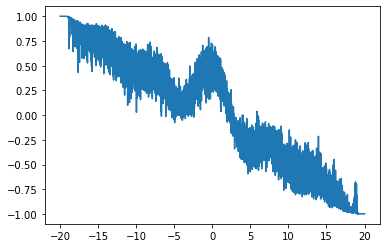

[Epoch 33/50] [Batch 25/100] [D loss: 0.015242] [G loss: 0.759408]


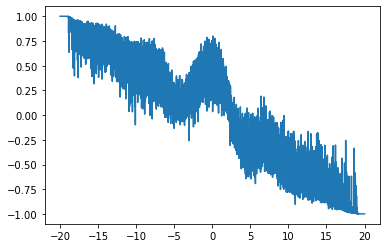

[Epoch 33/50] [Batch 50/100] [D loss: 0.016204] [G loss: 0.774278]


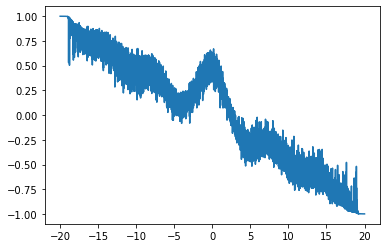

[Epoch 33/50] [Batch 75/100] [D loss: 0.014190] [G loss: 0.738676]


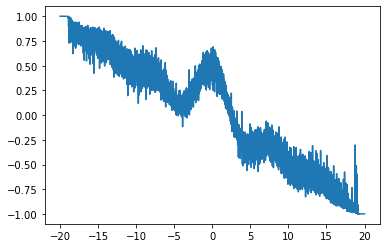

[Epoch 34/50] [Batch 0/100] [D loss: 0.012841] [G loss: 0.734389]


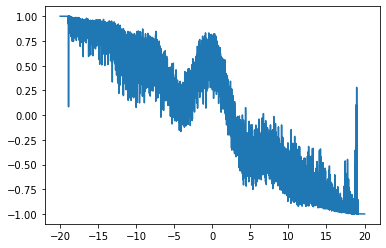

[Epoch 34/50] [Batch 25/100] [D loss: 0.013892] [G loss: 0.753915]


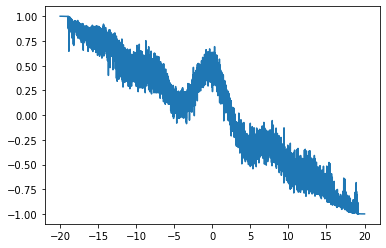

[Epoch 34/50] [Batch 50/100] [D loss: 0.017776] [G loss: 0.813870]


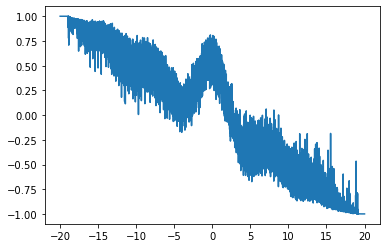

[Epoch 34/50] [Batch 75/100] [D loss: 0.014290] [G loss: 0.764478]


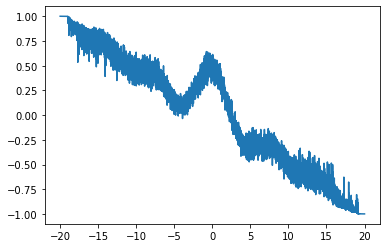

[Epoch 35/50] [Batch 0/100] [D loss: 0.011698] [G loss: 0.770393]


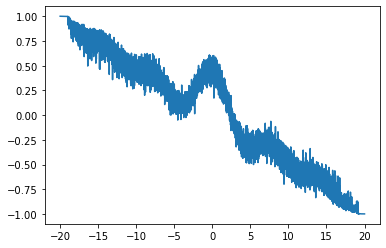

[Epoch 35/50] [Batch 25/100] [D loss: 0.013046] [G loss: 0.724930]


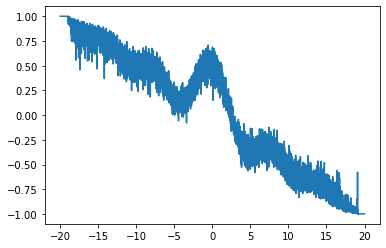

[Epoch 35/50] [Batch 50/100] [D loss: 0.012052] [G loss: 0.806719]


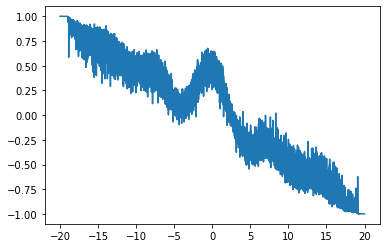

[Epoch 35/50] [Batch 75/100] [D loss: 0.010842] [G loss: 0.801864]


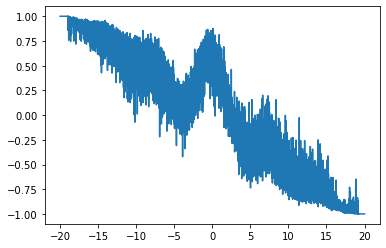

[Epoch 36/50] [Batch 0/100] [D loss: 0.011936] [G loss: 0.771614]


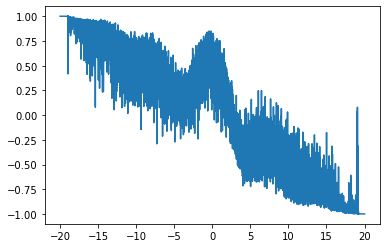

[Epoch 36/50] [Batch 25/100] [D loss: 0.011104] [G loss: 0.770094]


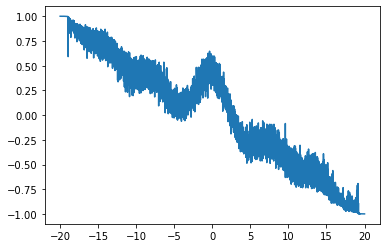

[Epoch 36/50] [Batch 50/100] [D loss: 0.010074] [G loss: 0.784356]


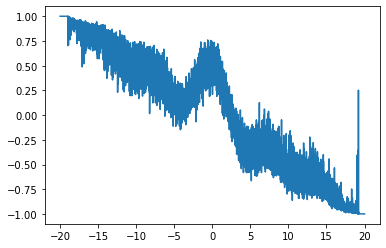

[Epoch 36/50] [Batch 75/100] [D loss: 0.009258] [G loss: 0.793770]


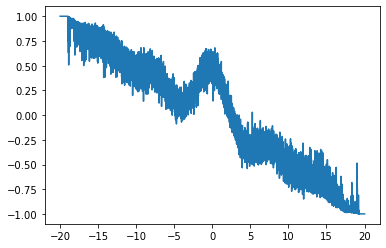

[Epoch 37/50] [Batch 0/100] [D loss: 0.009437] [G loss: 0.787681]


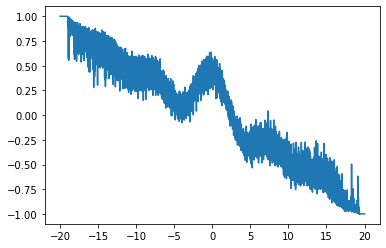

[Epoch 37/50] [Batch 25/100] [D loss: 0.009016] [G loss: 0.792945]


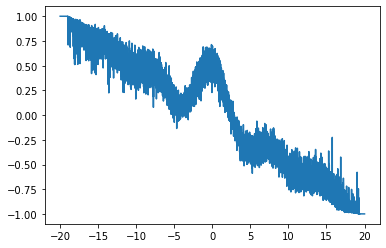

[Epoch 37/50] [Batch 50/100] [D loss: 0.007953] [G loss: 0.827685]


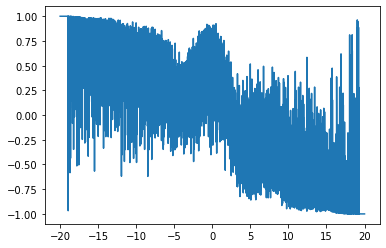

[Epoch 37/50] [Batch 75/100] [D loss: 0.008316] [G loss: 0.776639]


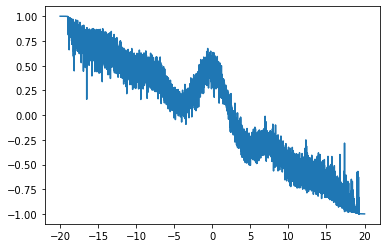

[Epoch 38/50] [Batch 0/100] [D loss: 0.011321] [G loss: 0.842133]


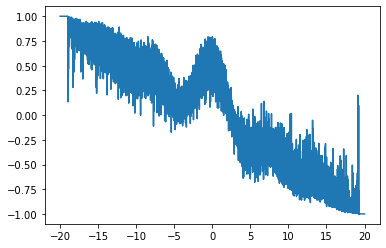

[Epoch 38/50] [Batch 25/100] [D loss: 0.010402] [G loss: 0.740343]


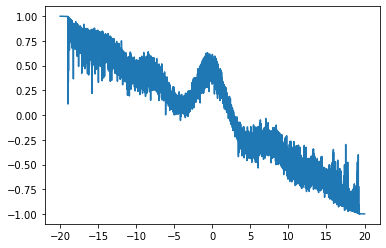

[Epoch 38/50] [Batch 50/100] [D loss: 0.007396] [G loss: 0.801652]


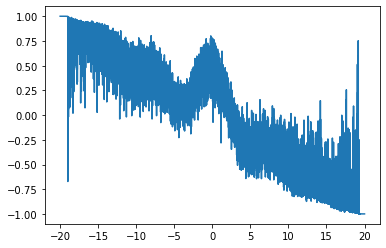

[Epoch 38/50] [Batch 75/100] [D loss: 0.007857] [G loss: 0.796939]


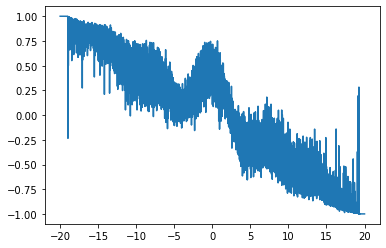

[Epoch 39/50] [Batch 0/100] [D loss: 0.006269] [G loss: 0.831904]


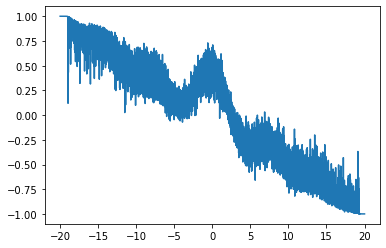

[Epoch 39/50] [Batch 25/100] [D loss: 0.013665] [G loss: 0.874695]


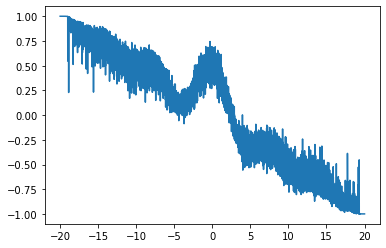

[Epoch 39/50] [Batch 50/100] [D loss: 0.007142] [G loss: 0.812833]


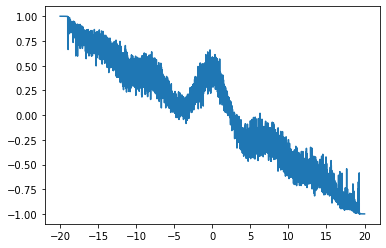

[Epoch 39/50] [Batch 75/100] [D loss: 0.017581] [G loss: 0.663514]


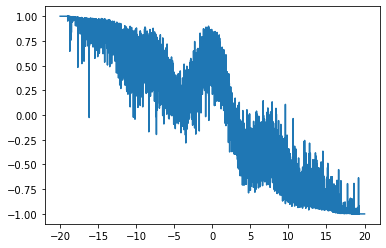

[Epoch 40/50] [Batch 0/100] [D loss: 0.006199] [G loss: 0.829023]


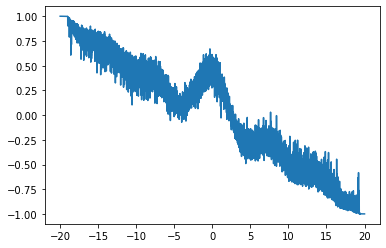

[Epoch 40/50] [Batch 25/100] [D loss: 0.500000] [G loss: 1.000000]


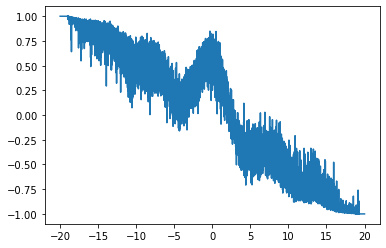

[Epoch 40/50] [Batch 50/100] [D loss: 0.500000] [G loss: 1.000000]


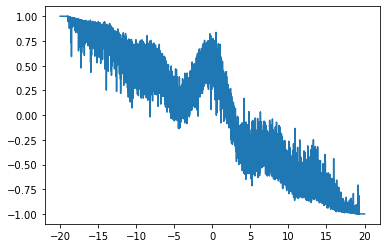

[Epoch 40/50] [Batch 75/100] [D loss: 0.500000] [G loss: 1.000000]


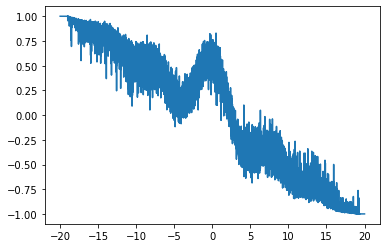

[Epoch 41/50] [Batch 0/100] [D loss: 0.500000] [G loss: 1.000000]


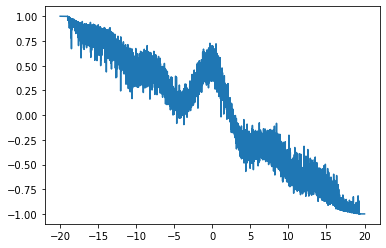

[Epoch 41/50] [Batch 25/100] [D loss: 0.500000] [G loss: 1.000000]


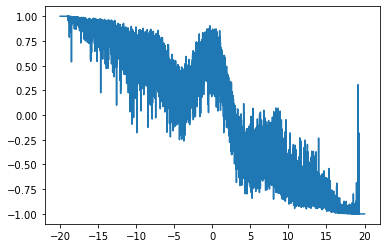

[Epoch 41/50] [Batch 50/100] [D loss: 0.500000] [G loss: 1.000000]


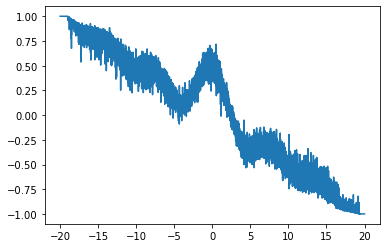

[Epoch 41/50] [Batch 75/100] [D loss: 0.500000] [G loss: 1.000000]


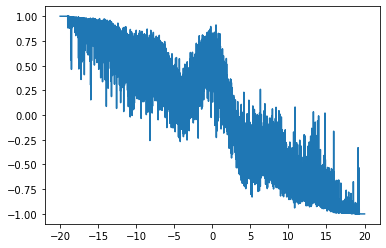

[Epoch 42/50] [Batch 0/100] [D loss: 0.500000] [G loss: 1.000000]


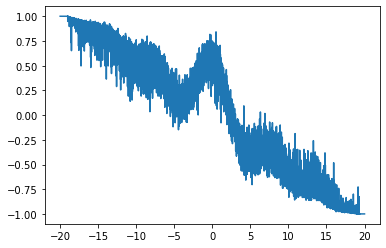

[Epoch 42/50] [Batch 25/100] [D loss: 0.500000] [G loss: 1.000000]


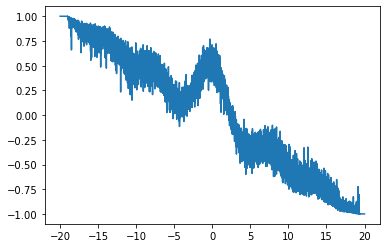

[Epoch 42/50] [Batch 50/100] [D loss: 0.500000] [G loss: 1.000000]


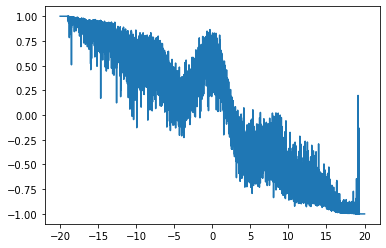

[Epoch 42/50] [Batch 75/100] [D loss: 0.500000] [G loss: 1.000000]


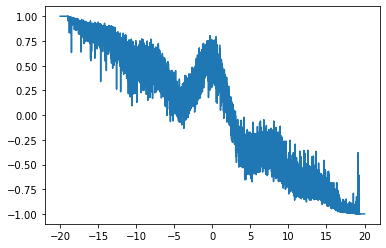

[Epoch 43/50] [Batch 0/100] [D loss: 0.500000] [G loss: 1.000000]


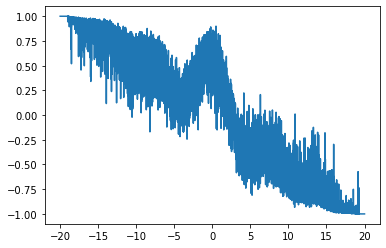

[Epoch 43/50] [Batch 25/100] [D loss: 0.500000] [G loss: 1.000000]


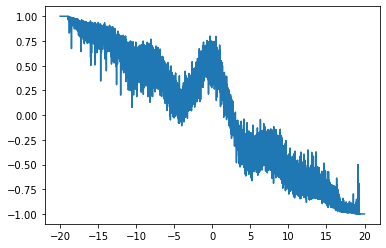

[Epoch 43/50] [Batch 50/100] [D loss: 0.500000] [G loss: 1.000000]


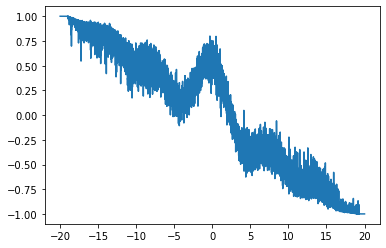

[Epoch 43/50] [Batch 75/100] [D loss: 0.500000] [G loss: 1.000000]


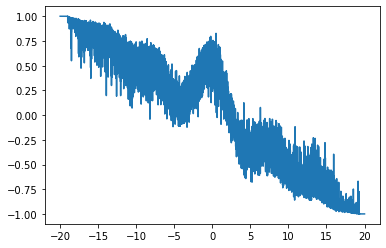

[Epoch 44/50] [Batch 0/100] [D loss: 0.500000] [G loss: 1.000000]


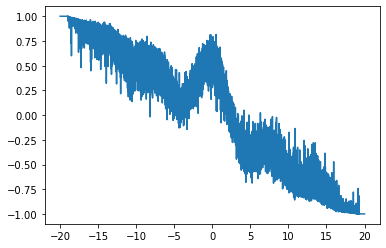

[Epoch 44/50] [Batch 25/100] [D loss: 0.500000] [G loss: 1.000000]


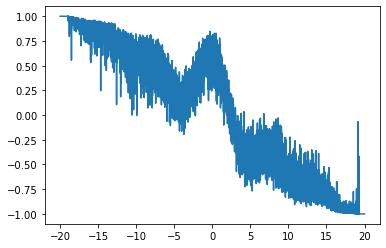

[Epoch 44/50] [Batch 50/100] [D loss: 0.500000] [G loss: 1.000000]


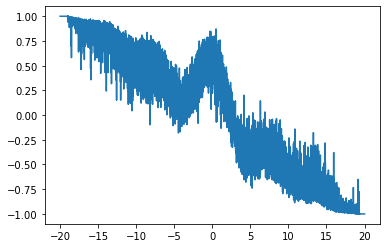

[Epoch 44/50] [Batch 75/100] [D loss: 0.500000] [G loss: 1.000000]


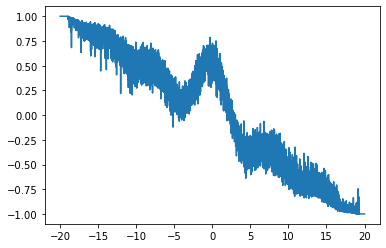

[Epoch 45/50] [Batch 0/100] [D loss: 0.500000] [G loss: 1.000000]


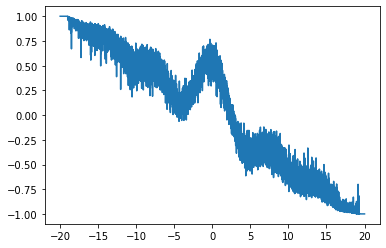

[Epoch 45/50] [Batch 25/100] [D loss: 0.500000] [G loss: 1.000000]


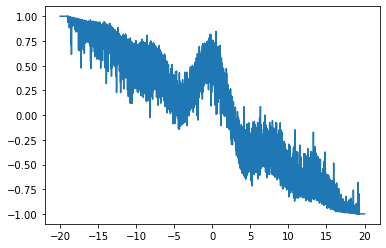

[Epoch 45/50] [Batch 50/100] [D loss: 0.500000] [G loss: 1.000000]


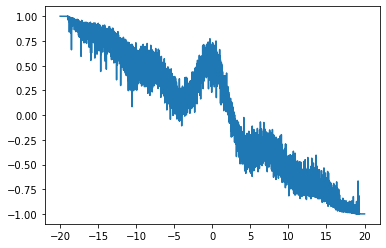

[Epoch 45/50] [Batch 75/100] [D loss: 0.500000] [G loss: 1.000000]


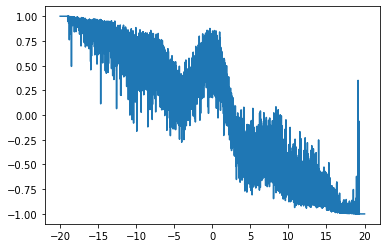

[Epoch 46/50] [Batch 0/100] [D loss: 0.500000] [G loss: 1.000000]


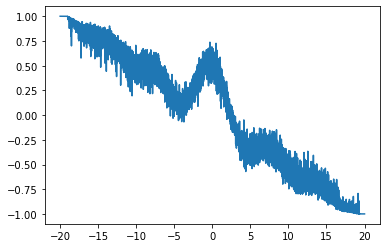

[Epoch 46/50] [Batch 25/100] [D loss: 0.500000] [G loss: 1.000000]


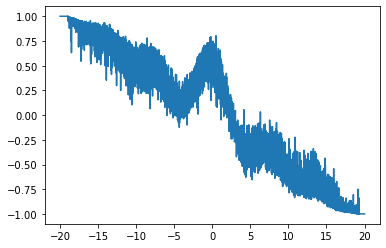

[Epoch 46/50] [Batch 50/100] [D loss: 0.500000] [G loss: 1.000000]


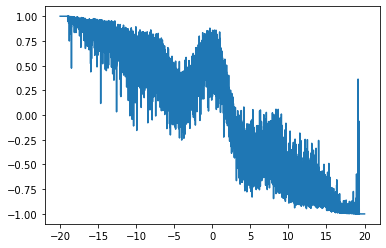

[Epoch 46/50] [Batch 75/100] [D loss: 0.500000] [G loss: 1.000000]


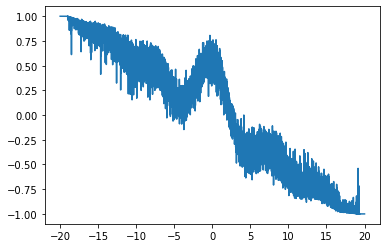

[Epoch 47/50] [Batch 0/100] [D loss: 0.500000] [G loss: 1.000000]


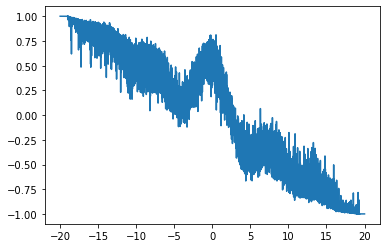

[Epoch 47/50] [Batch 25/100] [D loss: 0.500000] [G loss: 1.000000]


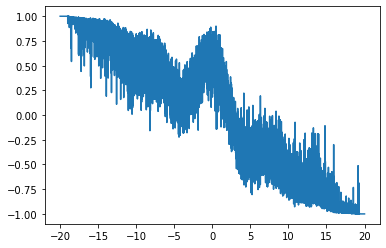

[Epoch 47/50] [Batch 50/100] [D loss: 0.500000] [G loss: 1.000000]


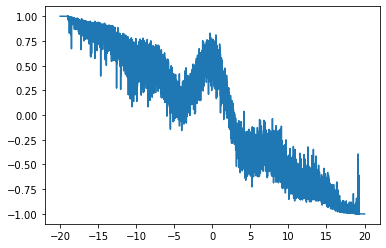

[Epoch 47/50] [Batch 75/100] [D loss: 0.500000] [G loss: 1.000000]


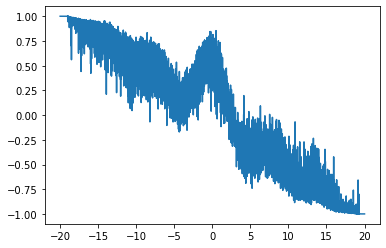

[Epoch 48/50] [Batch 0/100] [D loss: 0.500000] [G loss: 1.000000]


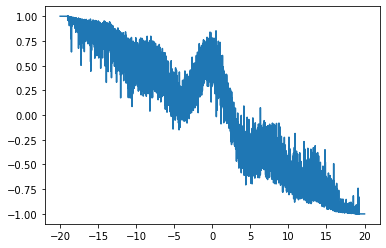

[Epoch 48/50] [Batch 25/100] [D loss: 0.500000] [G loss: 1.000000]


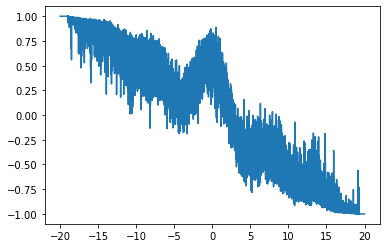

[Epoch 48/50] [Batch 50/100] [D loss: 0.500000] [G loss: 1.000000]


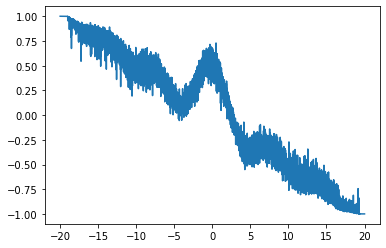

[Epoch 48/50] [Batch 75/100] [D loss: 0.500000] [G loss: 1.000000]


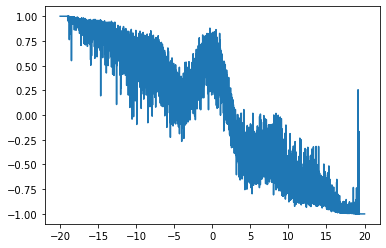

[Epoch 49/50] [Batch 0/100] [D loss: 0.500000] [G loss: 1.000000]


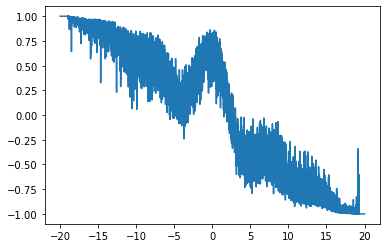

[Epoch 49/50] [Batch 25/100] [D loss: 0.500000] [G loss: 1.000000]


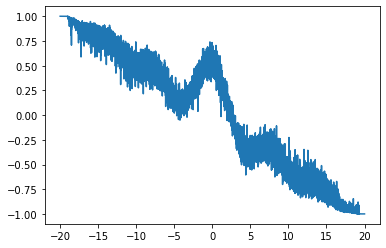

[Epoch 49/50] [Batch 50/100] [D loss: 0.500000] [G loss: 1.000000]


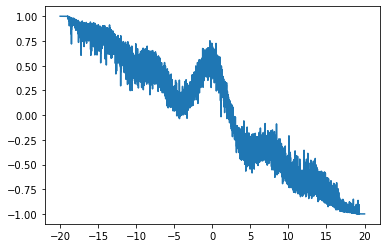

[Epoch 49/50] [Batch 75/100] [D loss: 0.500000] [G loss: 1.000000]


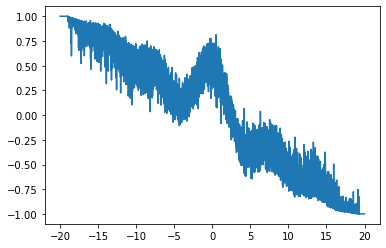

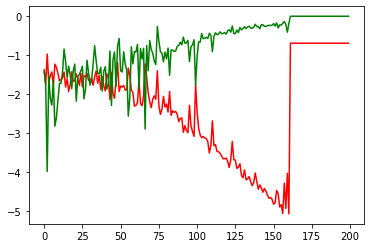

In [33]:
d_loss_history = []
g_loss_history = []

for epoch in range(n_epochs):
    for i in range(iters_in_epoch):
        
##################### Лейблы для данных: 1 - настоящие, 0 - сгенерированные ########
        valid = torch.FloatTensor(batch_size, 1).fill_(1.0)
        fake = torch.FloatTensor(batch_size, 1).fill_(0.0)

        real_data = y_batched


######################  Тренировка генератора    ##########################

        optimizer_G.zero_grad()
    
        #генерация шума
        z = torch.FloatTensor(np.random.normal(0, 1, (batch_size, latent_dim)))
        
        # Генерируем даные Генератором на основе шума
        gen_data = generator(z)
        
        # Подаем сгенерированые данные на Дискриминатор 
        validity = discriminator(gen_data)
        
        # Тут сравниваем предсказанные значения Дискриминатора(на основе сгенерировнных данных) с настоящими
        g_loss = adversarial_loss(validity, valid)
        
        # Делаем шаг обучения нашего Генератора
        g_loss.backward()
        optimizer_G.step()

######################  Тренировка дискриминатора    ##########################

        optimizer_D.zero_grad()
        
        # Получаем предсказания дискриминатора на основе реальных данных
        real_pred = discriminator(real_data)
        
        # Тут сравниваем предсказанные значения Дискриминатора(на основе настоящих данных) с настоящими
        d_real_loss = adversarial_loss(real_pred, valid)
        
        # Опять делаем предсказание на Дискриминаторе с помощью сгенерированных данных
        fake_pred = discriminator(gen_data.detach())
        
        # расчитываем ошибку предсказанного с фейковыми лейблами
        d_fake_loss = adversarial_loss(fake_pred, fake)
        
        # И усредняем два лосса в один
        d_loss = (d_real_loss + d_fake_loss) / 2

        d_loss.backward()
        optimizer_D.step()
        
######## Отображение процесса обучения и вывод функций потерь ############
        batches_done = epoch * iters_in_epoch + i
    
        if batches_done % sample_interval == 0:
            with torch.no_grad():
                d_loss_val = float(d_loss.detach())
                g_loss_val = float(g_loss.detach())
                print("[Epoch %d/%d] [Batch %d/%d] [D loss: %f] [G loss: %f]"% (epoch, n_epochs, i, iters_in_epoch, d_loss_val, g_loss_val) ) 

                d_loss_history.append(d_loss_val)
                g_loss_history.append(g_loss_val)
                plt.plot(x, gen_data[0])
                plt.show()

plt.plot(np.log(np.array(d_loss_history)), label='D loss', color = 'red')
plt.plot(np.log(np.array(g_loss_history)), label='G loss', color = 'green')
plt.show()



GAN достаточно быстро обучается генерации заданной функции, хотя и сильно зашумленной. По какой-то причине с 40 эпохи возникают странные значения d_loss=0.5 и g_loss=1. 